In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, Ridge, LinearRegression, LassoCV, Lasso, LogisticRegression, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 


In [2]:
df = pd.read_csv('stats.csv')
df.head(n=10)
#split the last_name,first_name column to be two sepearate columns 1 for first name, 1 for last name by first creating a full_name column then splitting
df[['full_name']]= df[['last_name, first_name']]
df[['last_name','first_name']]=df.full_name.str.split(', ',expand=True)

#drop the original last_name,first_name columns 
df.drop('last_name, first_name',axis = 1,inplace=True)

print(f'There are {len(df)} observations made on {len(df.columns)} features considered in this dataset. ' +
      f' \n ' +
      f'Those features are: ' +
      f' \n')
    
for column in df.columns:
    print(column)

print(f'\n Feature of interest: on_base_plus_slg')

There are 538 observations made on 25 features considered in this dataset.  
 Those features are:  

player_id
year
pa
hit
single
double
triple
home_run
k_percent
bb_percent
on_base_plus_slg
exit_velocity_avg
sweet_spot_percent
barrel_batted_rate
solidcontact_percent
hard_hit_percent
avg_best_speed
avg_hyper_speed
whiff_percent
swing_percent
groundballs_percent
flyballs_percent
full_name
last_name
first_name

 Feature of interest: on_base_plus_slg


In [3]:
df.drop('last_name',axis=1,inplace=True)
df.drop('full_name',axis=1,inplace=True)
df.drop('first_name',axis=1,inplace=True)
df.drop("player_id", axis=1, inplace=True)

In [4]:
print(f'\n Checking for missing (Na) values: \n ')
print(f'{df.isna().sum()}')
print(f'\n Checking for duplicated values: \n ')
print(f'{df.duplicated().sum()}')


 Checking for missing (Na) values: 
 
year                    0
pa                      0
hit                     0
single                  0
double                  0
triple                  0
home_run                0
k_percent               0
bb_percent              0
on_base_plus_slg        0
exit_velocity_avg       0
sweet_spot_percent      0
barrel_batted_rate      0
solidcontact_percent    0
hard_hit_percent        0
avg_best_speed          0
avg_hyper_speed         0
whiff_percent           0
swing_percent           0
groundballs_percent     0
flyballs_percent        0
dtype: int64

 Checking for duplicated values: 
 
0


In [5]:
train_df = df[(df['year'] == 2021) | (df['year'] == 2020)]
val_df = df[df.year==2022]
test_df = df[df.year==2023]


model = LinearRegression()

scaler = StandardScaler()

features = ['k_percent','exit_velocity_avg','sweet_spot_percent', 'barrel_batted_rate','solidcontact_percent', 'hard_hit_percent', 
          'avg_best_speed','avg_hyper_speed',
          'whiff_percent', 'swing_percent',
          'groundballs_percent', 'flyballs_percent']

# Train data
X_train = train_df.loc[:, train_df.columns!="on_base_plus_slg"]
y_train = train_df["on_base_plus_slg"]
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data

model.fit(X_train_scaled, y_train)

# Validation
X_val = val_df.loc[:, val_df.columns!="on_base_plus_slg"]
y_val = val_df["on_base_plus_slg"]
X_val_scaled = scaler.transform(X_val)  # Scale validation data

validation_score = model.score(X_val_scaled, y_val)
print(f"The validation score is {validation_score}")

# Testing
X_test = test_df.loc[:, test_df.columns!="on_base_plus_slg"]
y_test = test_df["on_base_plus_slg"]
X_test_scaled = scaler.transform(X_test)  # Scale testing data

test_score = model.score(X_test_scaled, y_test)
print(f"The test score is {test_score}")


The validation score is 0.8188072421681414
The test score is 0.626917449319472


# Ridge Regression

# Test out Ridge Modeling

In [50]:
alpha_grid = np.logspace(-4, 6, 50)
grid_search = GridSearchCV(estimator=Ridge(), param_grid={'alpha': alpha_grid}, cv=5, scoring='r2', verbose=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[features])
grid_search.fit(X_train_scaled, y_train)

# Extracting best estimator and scoring
best_alpha = grid_search.best_params_['alpha']
print(f"The Ridge score on training set is {grid_search.score(X_train_scaled, y_train)}")
print(f"The best alpha is {best_alpha}")

# Scoring on test and validation sets
X_test_scaled = scaler.transform(test_df[features])
X_val_scaled = scaler.transform(val_df[features])
print(f"The Ridge score on the test set is {grid_search.score(X_test_scaled, y_test)}")
print(f"The Ridge score on the validation set is {grid_search.score(X_val_scaled, y_val)}")

# Error metrics on validation data
validation_predictions = grid_search.predict(X_val_scaled)
MAE_val = mean_absolute_error(y_val, validation_predictions)
MSE_val = mean_squared_error(y_val, validation_predictions)
RMSE_val = np.sqrt(MSE_val)
print(f"MAE on Validation Data: {MAE_val:.6f}")
print(f"RMSE on Validation Data: {RMSE_val:.6f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
The Ridge score on training set is 0.6345026160977894
The best alpha is 4.941713361323838
The Ridge score on the test set is 0.5858303259203949
The Ridge score on the validation set is 0.4164689220961073
MAE on Validation Data: 0.052316
RMSE on Validation Data: 0.063589


In [13]:
test_predictions = grid_search.predict(X_test_scaled)

MAE_test = mean_absolute_error(y_test, test_predictions)
MSE_test = mean_squared_error(y_test, test_predictions)
RMSE_test = np.sqrt(MSE_test)

print("MAE on Test Data:", MAE_test)
print("MSE on Test Data:", MSE_test)
print("RMSE on Test Data:", RMSE_test)

MAE on Test Data: 0.04192535466859918
MSE on Test Data: 0.002748349157661835
RMSE on Test Data: 0.052424699881466516


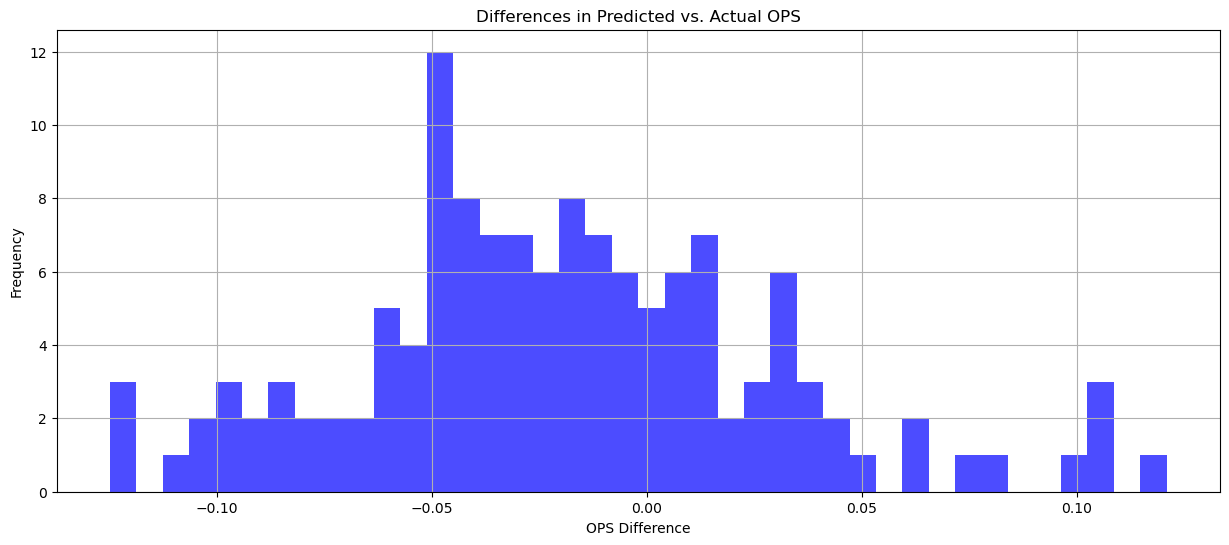

In [14]:
differences = y_test - test_predictions

plt.figure(figsize=(15, 6))
plt.hist(differences, bins=40, alpha=0.7, color='blue')
plt.title('Differences in Predicted vs. Actual OPS')
plt.xlabel('OPS Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

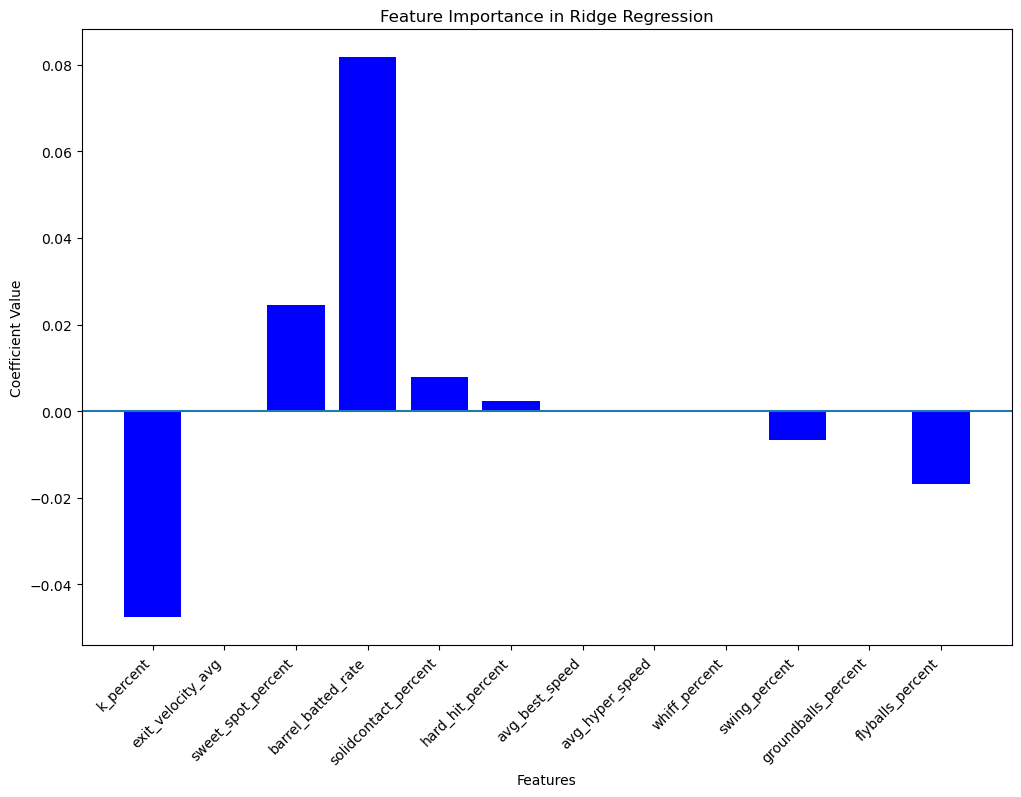

In [36]:
best_ridge = grid_search.best_estimator_

coefficients = best_ridge.coef_

feature_names = features 

# Included features (non-zero coefficients)
included_features = [feature for coef, feature in zip(coefficients, feature_names) if coef != 0]

# Excluded features (zero coefficients)
excluded_features = [feature for coef, feature in zip(coefficients, feature_names) if coef == 0]

plt.figure(figsize=(12, 8))
plt.bar(feature_names, coefficients, color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Ridge Regression')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0)
plt.show()

# Lasso

In [ ]:
X_val

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
features = ['k_percent','exit_velocity_avg','sweet_spot_percent', 'barrel_batted_rate','solidcontact_percent', 'hard_hit_percent', 
          'avg_best_speed','avg_hyper_speed',
          'whiff_percent', 'swing_percent',
          'groundballs_percent', 'flyballs_percent']


alpha_grid = np.logspace(-4, 6, 50)  
#Apply grid search

grid_search = GridSearchCV(estimator=Lasso(), param_grid={'alpha': alpha_grid}, cv=5, scoring='r2', verbose=1)

#Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[features])

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Extract the best estimator (Lasso model with the best alpha)
best_alpha = grid_search.best_params_['alpha']

# Scoring the model on the training set
train_score = grid_search.score(X_train_scaled, y_train)
print(f"The Lasso score on training set is {train_score}")
print(f"The best alpha is {best_alpha}")

# Scoring the model on the test set
X_test_scaled = scaler.transform(test_df[features])  # Scale the test set
test_score = grid_search.score(X_test_scaled, y_test)  # Compute test score
print(f"The Lasso score on the test set is {test_score}")

# Scoring the model on the validation set
X_val_scaled = scaler.transform(val_df[features])  # Scale the test set
test_score = grid_search.score(X_val_scaled, y_val)  # Compute test score
print(f"The Lasso score on the test set is {test_score}")



# Generate predictions for validation data
validation_predictions = grid_search.predict(X_val_scaled)  # Use best_lasso directly

# Calculate errors
MAE_val = mean_absolute_error(y_val, validation_predictions)
MSE_val = mean_squared_error(y_val, validation_predictions)
RMSE_val = np.sqrt(MSE_val)

# Print the results
print("MAE_val: %.6f" % (MAE_val))
print("MSE_val: %.6f" % (MSE_val))
print("RMSE_val: %.6f" % (RMSE_val))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
The Lasso score on training set is 0.6344688488611507
The best alpha is 0.0010481131341546852
The Lasso score on the test set is 0.5938070114111651
The Lasso score on the test set is 0.4214694496776328
MAE_val: 0.052077
MSE_val: 0.004009
RMSE_val: 0.063316


In [19]:
test_predictions = grid_search.predict(X_test_scaled)

MAE_test = mean_absolute_error(y_test, test_predictions)
MSE_test = mean_squared_error(y_test, test_predictions)
RMSE_test = np.sqrt(MSE_test)

print("MAE on Test Data:", MAE_test)
print("MSE on Test Data:", MSE_test)
print("RMSE on Test Data:", RMSE_test)

MAE on Test Data: 0.04145570822534157
MSE on Test Data: 0.0026954174289006466
RMSE on Test Data: 0.051917409689820296


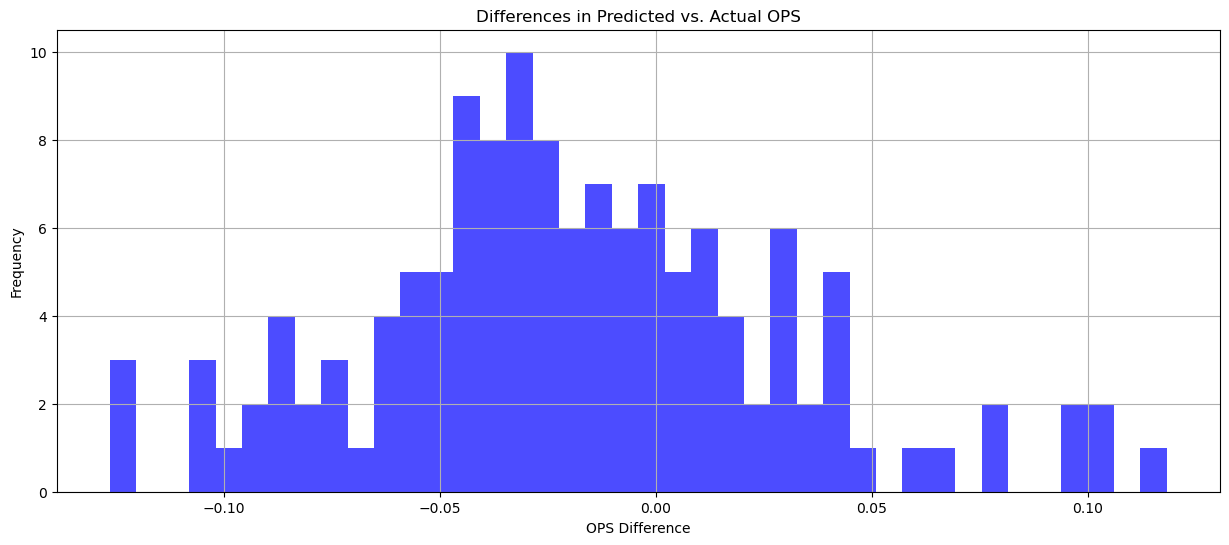

In [20]:
differences = y_test - test_predictions

plt.figure(figsize=(15, 6))
plt.hist(differences, bins=40, alpha=0.7, color='blue')
plt.title('Differences in Predicted vs. Actual OPS')
plt.xlabel('OPS Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

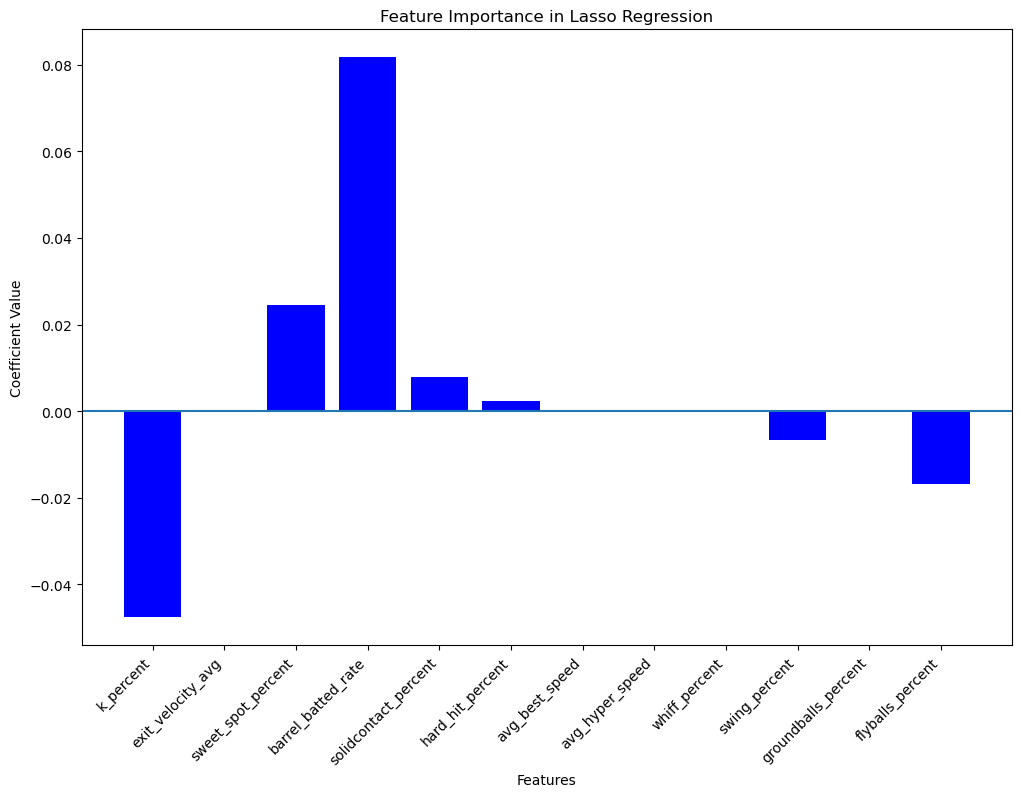

In [35]:
best_lasso = grid_search.best_estimator_

coefficients = best_lasso.coef_

feature_names = features 

# Included features (non-zero coefficients)
included_features = [feature for coef, feature in zip(coefficients, feature_names) if coef != 0]

# Excluded features (zero coefficients)
excluded_features = [feature for coef, feature in zip(coefficients, feature_names) if coef == 0]

plt.figure(figsize=(12, 8))
plt.bar(feature_names, coefficients, color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Lasso Regression')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0)
plt.show()

# Decision Tree Regressor
* Decision tree regression may not be the best method as its score is relatively low

In [ ]:
model= DecisionTreeRegressor()

model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)


from sklearn.metrics import mean_absolute_error

# Assuming y_pred and y_test are your predicted and true labels, respectively
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)



# Gradient Boosting

In [ ]:
X_train = train_df.loc[:, train_df.columns!="on_base_plus_slg"]
X_train= X_train[features]
X_train_scaled= scaler.fit_transform(X_train)

X_test = test_df.loc[:, test_df.columns!="on_base_plus_slg"]
X_test= X_test[features]
X_test_scaled= scaler.transform(X_test)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [1, 3, 5]
}

gb = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(X_train_scaled, y_train)

best_gb = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict on the test data
y_pred = best_gb.predict(X_test_scaled)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r_squared = best_gb.score(X_test_scaled, y_test)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

import matplotlib.pyplot as plt

feature_importances = best_gb.feature_importances_


feature_importances